# Project Goal:

- Create a world map with COVID-19 cases
- Examine the impact of COVID-19 on the energy consumption in Italy
- Plot some information about COVID-19 cases


## COVID-19 Cases around the world

#### Loading data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df_raw = pd.read_csv(url)

In [3]:
df_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39,53,62,71,77,78
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219,1405,1617,1791,2032


## Transform COVID-19 data

In [0]:
def cleandata(df_raw):
  df_cleaned = df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
  return df_cleaned

In [5]:
df = cleandata(df_raw)
df.tail(10)

,Province/State,Country/Region,Lat,Long,Date,Cases
17516,NaN,Saint Kitts and Nevis,17.357822,-62.782998,3/30/20,7
17517,Northwest Territories,Canada,64.825500,-124.845700,3/30/20,1
17518,Yukon,Canada,64.282300,-135.000000,3/30/20,4
17519,NaN,Kosovo,42.602636,20.902977,3/30/20,94
17520,NaN,Burma,21.916200,95.956000,3/30/20,14
17521,Anguilla,United Kingdom,18.220600,-63.068600,3/30/20,2
17522,British Virgin Islands,United Kingdom,18.420700,-64.640000,3/30/20,2
17523,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,3/30/20,5
17524,NaN,MS Zaandam,0.000000,0.000000,3/30/20,2
17525,NaN,Botswana,-22.328500,24.684900,3/30/20,3


In [6]:
print(df_raw.shape)
print(df.shape)

(254, 73)
(17526, 6)


## COVID-19 cases world map

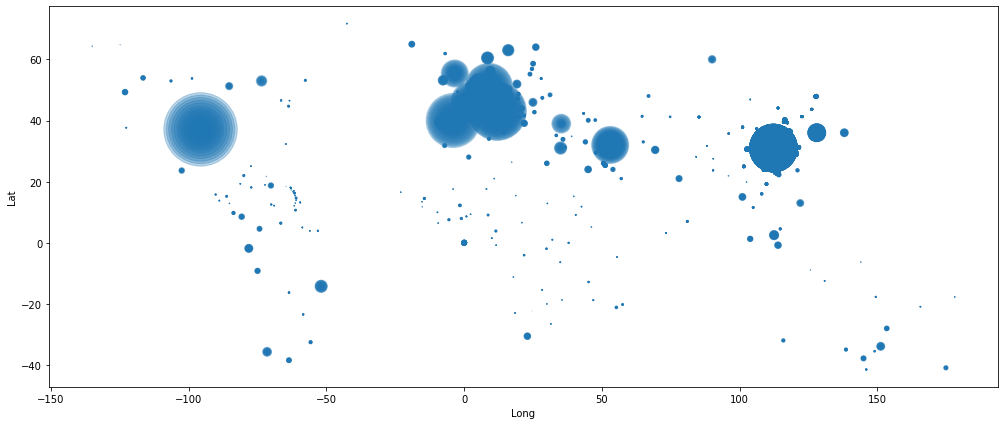

In [7]:
df.plot(kind='scatter', x='Long', y='Lat', figsize=(17,7), s=df['Cases']/30, alpha=0.3)

In [8]:
cd 'drive/My Drive/Colab Notebooks/covid-19/COVID-19'

/content/drive/My Drive/Colab Notebooks/covid-19/COVID-19


In [9]:
ls

Corona_ADek.ipynb    Italy_Temperature_19.csv  README.md
Italy_Energy_19.csv  Italy_Temperature_20.csv  wrldmap.jpg
Italy_Energy_20.csv  LICENSE


Text(0.5, 0.98, 'COVID-19 Cases around the world')

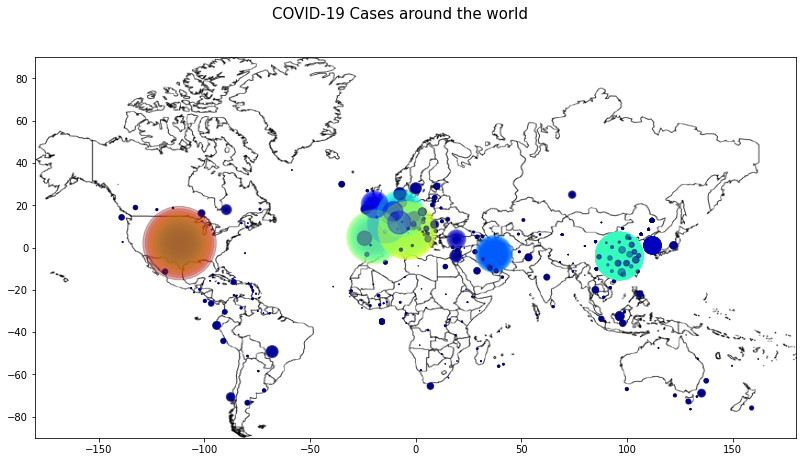

In [10]:
img = plt.imread('wrldmap.jpg')
fig, ax = plt.subplots(figsize=(17,7))
ax.imshow(img, extent=[-180, 180, -90, 90])
ax.scatter(x=df['Long']-16, y=df['Lat']-35, alpha=0.3, s=df['Cases']/30, c=df['Cases'], cmap=plt.get_cmap('jet'))
fig.suptitle('COVID-19 Cases around the world', fontsize=15)


In [11]:
ls

Corona_ADek.ipynb    Italy_Temperature_19.csv  README.md
Italy_Energy_19.csv  Italy_Temperature_20.csv  wrldmap.jpg
Italy_Energy_20.csv  LICENSE


In [0]:
energy_2019 = pd.read_csv('Italy_Energy_19.csv')
energy_2020 = pd.read_csv('Italy_Energy_20.csv')

## Clean energy consumption data

In [0]:
def tansform_date(row):
  return row.split('-')[0].strip()

def transform_df(df, resample, na_value=np.NaN):
  # Cleaning data
  df = df.drop('Day-ahead Total Load Forecast [MW] - Italy (IT)', axis=1)
  df['Actual Total Load [MW] - Italy (IT)'] = df['Actual Total Load [MW] - Italy (IT)'].replace('-', na_value)
  df = df.dropna()
  df = df.rename({'Actual Total Load [MW] - Italy (IT)': 'Total Load [MW]'}, axis=1)
  df['Total Load [MW]'] = pd.to_numeric(df['Total Load [MW]'])
  
  # Creating time series
  df['Time (CET)'] = df['Time (CET)'].apply(lambda x: tansform_date(x))
  df['Time (CET)'] = pd.to_datetime(df['Time (CET)'], format='%d.%m.%Y %H:%M')
  df = df.set_index('Time (CET)')
  
  # Resampling data daily
  df = df.resample(resample).sum()
  return df

In [14]:
daily_2019 = transform_df(energy_2019, 'D')
daily_2019 = daily_2019.loc[:'2019-03-28']
daily_2019

,Total Load [MW]
Time (CET),
2019-01-01,578708.0
2019-01-02,745075.0
2019-01-03,792723.0
2019-01-04,821707.0
2019-01-05,726533.0
...,...
2019-03-24,597458.0
2019-03-25,782351.0
2019-03-26,836152.0


In [15]:
daily_2020 = transform_df(energy_2020, 'D')
daily_2020

,Total Load [MW]
Time (CET),
2020-01-01,554946
2020-01-02,696136
2020-01-03,723707
2020-01-04,662333
2020-01-05,605811
...,...
2020-03-24,639376
2020-03-25,640281
2020-03-26,623366


In [16]:

daily_2020 = transform_df(energy_2020, 'D')
daily_2020 = daily_2020.loc[:'2020-03-28']
daily_2020

,Total Load [MW]
Time (CET),
2020-01-01,554946
2020-01-02,696136
2020-01-03,723707
2020-01-04,662333
2020-01-05,605811
...,...
2020-03-24,639376
2020-03-25,640281
2020-03-26,623366


In [17]:
monthly_2019 = transform_df(energy_2019, 'M', 0)
monthly_2019

,Total Load [MW]
Time (CET),
2019-01-31,26589991.0
2019-02-28,23704533.0
2019-03-31,24271996.0
2019-04-30,22043413.0
2019-05-31,23129237.0
2019-06-30,25547177.0
2019-07-31,29007637.0
2019-08-31,24552027.0
2019-09-30,24455380.0


In [18]:
monthly_2020 = transform_df(energy_2020, 'M', 0)
monthly_2020

,Total Load [MW]
Time (CET),
2020-01-31,25114893
2020-02-29,23373327
2020-03-31,19467852
2020-04-30,0
2020-05-31,0
2020-06-30,0
2020-07-31,0
2020-08-31,0
2020-09-30,0


## Comparision of monthly energy consumption in Italy in 2019 and 2020

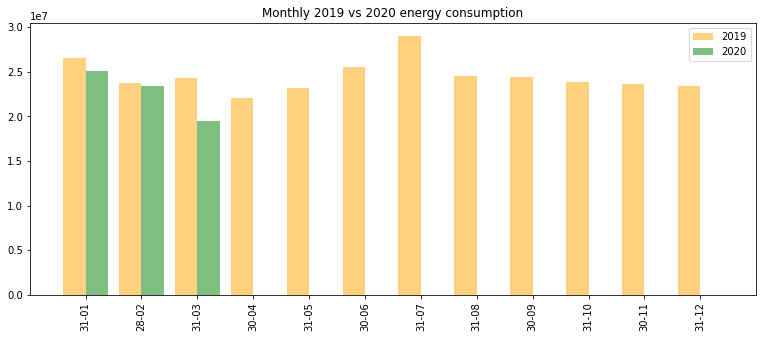

In [19]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 5))

x = np.arange(len(monthly_2019))
bar_width = 0.4
opacity = 0.5

plt.bar(x, monthly_2019['Total Load [MW]'], width=bar_width, color='orange', alpha=opacity, label='2019')
plt.bar(x + bar_width, monthly_2020['Total Load [MW]'], width=bar_width, color='green', alpha=opacity, label='2020')

plt.title('Monthly 2019 vs 2020 energy consumption')
plt.xticks(x+bar_width/2, monthly_2019.index.strftime('%d-%m'), rotation=90)
plt.legend()

### Conclusion

COVID-19 may have an impact on the energy consumption in italy.
We will examine this in the next few steps

## Daily data

In [20]:
daily_2019

,Total Load [MW]
Time (CET),
2019-01-01,578708.0
2019-01-02,745075.0
2019-01-03,792723.0
2019-01-04,821707.0
2019-01-05,726533.0
...,...
2019-03-24,597458.0
2019-03-25,782351.0
2019-03-26,836152.0


In [21]:
daily_2020.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [0]:
daily_2019 = daily_2019.loc['2019-01-07':]
daily_2020 = daily_2020.loc['2020-01-06':'2020-03-26']

Text(0, 0.5, 'Total Load [MW]')

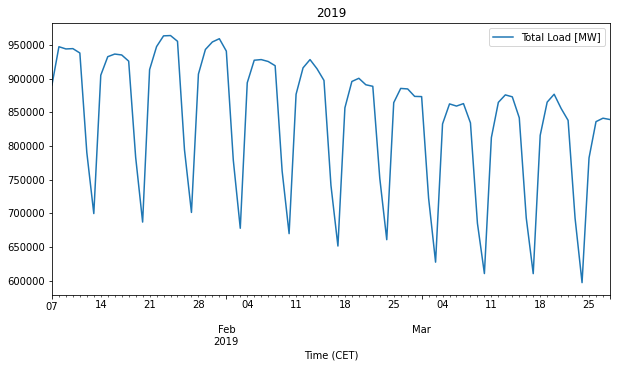

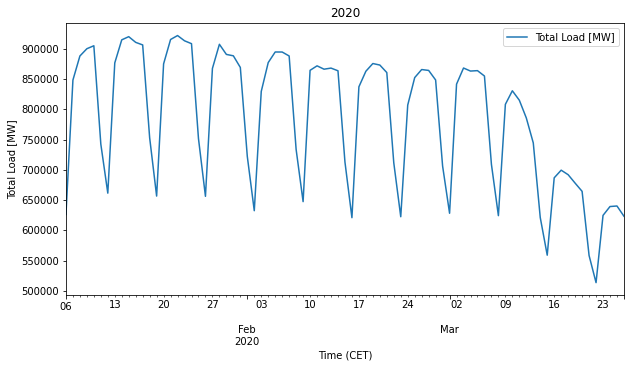

In [23]:
daily_2019.plot(figsize=(10,5))
plt.title('2019')

daily_2020.plot(figsize=(10, 5))
plt.title('2020')
plt.ylabel('Total Load [MW]')

In [24]:
print(daily_2019.shape)
print(daily_2020.shape)

(81, 1)
(81, 1)


In [25]:
idx = daily_2019.index.strftime('%m-%d')
idx

Index(['01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21', '01-22',
       '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30',
       '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07',
       '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15',
       '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23',
       '02-24', '02-25', '02-26', '02-27', '02-28', '03-01', '03-02', '03-03',
       '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19',
       '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26', '03-27',
       '03-28'],
      dtype='object')

In [26]:
y_vs_y = pd.DataFrame({'2019': daily_2019['Total Load [MW]'].values, '2020': daily_2020['Total Load [MW]'].values}, index=idx)
y_vs_y

,2019,2020
01-07,890497.0,626258
01-08,947259.0,848243
01-09,943955.0,887957
01-10,944428.0,899961
01-11,937965.0,904857
...,...,...
03-24,597458.0,513704
03-25,782351.0,624764
03-26,836152.0,639376
03-27,841277.0,640281


Text(0.5, 0, 'Date')

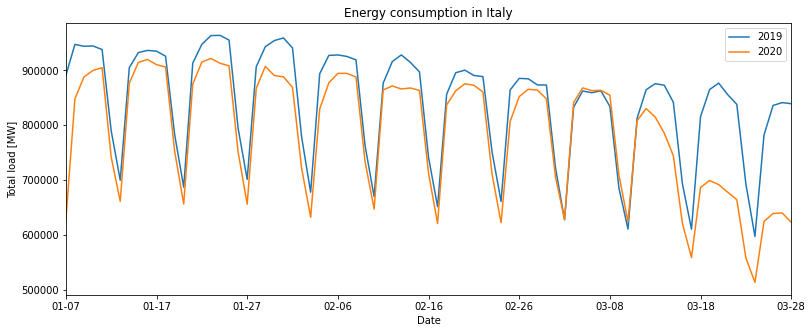

In [27]:
y_vs_y.plot(figsize=(13,5))
plt.title('Energy consumption in Italy')
plt.ylabel('Total load [MW]')
plt.xlabel('Date')

In [28]:
y_vs_y.index

Index(['01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21', '01-22',
       '01-23', '01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30',
       '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07',
       '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15',
       '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23',
       '02-24', '02-25', '02-26', '02-27', '02-28', '03-01', '03-02', '03-03',
       '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11',
       '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19',
       '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26', '03-27',
       '03-28'],
      dtype='object')

Text(0.5, 0, 'Date')

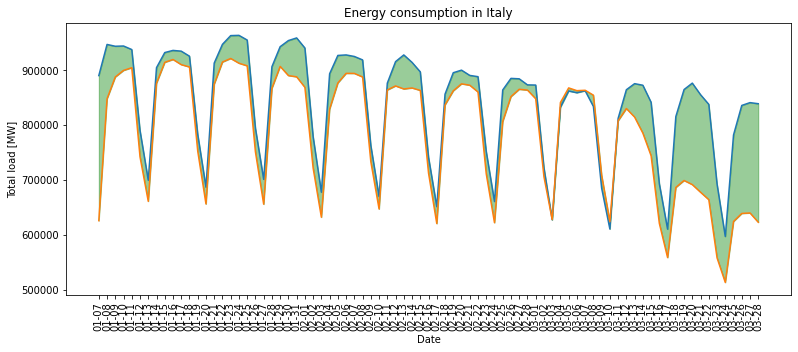

In [29]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 5))

plt.plot(y_vs_y.index, y_vs_y['2019'])
plt.plot(y_vs_y.index, y_vs_y['2020'])
plt.xticks(rotation=90)

plt.fill_between(y_vs_y.index, y_vs_y['2020'], y_vs_y['2019'], color='green', alpha=0.4)
plt.title('Energy consumption in Italy')
plt.ylabel('Total load [MW]')
plt.xlabel('Date')

In [30]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,1/22/20,0
6,NaN,Argentina,-38.4161,-63.6167,1/22/20,0
7,NaN,Armenia,40.0691,45.0382,1/22/20,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0


In [31]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [32]:
italy = df.loc[df['Country/Region']=='Italy', :]
italy['Date'] = pd.to_datetime(italy['Date'])
italy = italy.set_index('Date')
italy = italy.drop('Province/State', axis=1)
italy = italy.loc['2020-01-06':'2020-03-26']
italy.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country/Region,Lat,Long,Cases
Date,,,,
2020-03-22,Italy,43.0,12.0,59138
2020-03-23,Italy,43.0,12.0,63927
2020-03-24,Italy,43.0,12.0,69176
2020-03-25,Italy,43.0,12.0,74386
2020-03-26,Italy,43.0,12.0,80589


Text(0, 0.5, 'Cases')

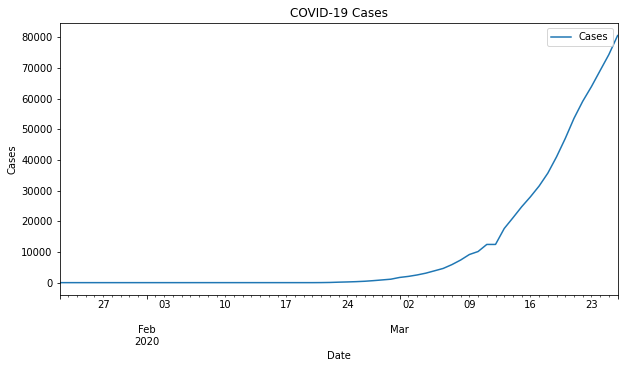

In [33]:
italy.plot(y='Cases', figsize=(10,5))
plt.title('COVID-19 Cases')
plt.ylabel('Cases')

In [34]:
italy['Cases'].shape

(65,)

We are changing the dates a bit in order to compare the same days of the week. This is a vital step due to the fact that the factories are generally closed during the weekend

In [0]:
x = daily_2019.loc['2019-01-23':'2019-03-28']['Total Load [MW]']
y = daily_2020.loc['2020-01-22':'2020-03-26']['Total Load [MW]']
idx_2 = x.index.strftime('%m-%d')

In [36]:
corona = pd.DataFrame({'2019': x.values, '2020': y.values, 'Cases': italy['Cases'].values}, index=idx_2)
corona.tail(10)

,2019,2020,Cases
03-19,865109.0,699415,31506
03-20,876795.0,691926,35713
03-21,855719.0,678002,41035
03-22,838068.0,664453,47021
03-23,692962.0,558516,53578
03-24,597458.0,513704,59138
03-25,782351.0,624764,63927
03-26,836152.0,639376,69176
03-27,841277.0,640281,74386
03-28,839296.0,623366,80589


## Energy consumption vs COVID-19 cases in Italy

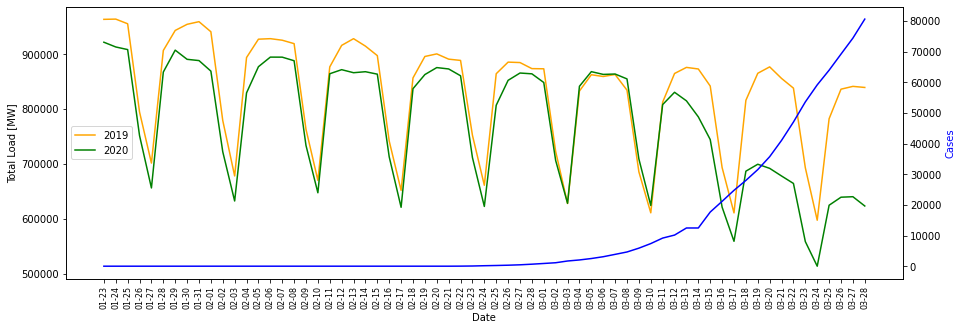

In [37]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.plot(idx_2, corona['2019'], color='orange', label='2019')
ax1.plot(idx_2, corona['2020'], color='g', label='2020')
ax2.plot(idx_2, corona['Cases'], 'b-')

ax1.legend(loc='center left')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total Load [MW]')
ax2.set_ylabel('Cases', color='b')
ax1.set_xticklabels(idx_2, rotation='vertical', size=8)
plt.show()

### Counclusion

The rise in 

## Lets add another feature to our analysis - the temperature

We need to load the temperature data

In [38]:
ls

Corona_ADek.ipynb    Italy_Temperature_19.csv  README.md
Italy_Energy_19.csv  Italy_Temperature_20.csv  wrldmap.jpg
Italy_Energy_20.csv  LICENSE


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Country/Region', 'Cases', 'Date']]
df

,Country/Region,Cases,Date
0,Afghanistan,0,2020-01-22
1,Albania,0,2020-01-22
2,Algeria,0,2020-01-22
3,Andorra,0,2020-01-22
4,Angola,0,2020-01-22
...,...,...,...
17521,United Kingdom,2,2020-03-30
17522,United Kingdom,2,2020-03-30
17523,United Kingdom,5,2020-03-30
17524,MS Zaandam,2,2020-03-30


In [40]:
by_country = df.pivot_table(index='Date', columns='Country/Region', values='Cases', aggfunc='sum')
by_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,...,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0


In [0]:
by_country = by_country.loc['2020-02-20':]

Text(0.5, 1.0, 'COVID-19 cases in some countries')

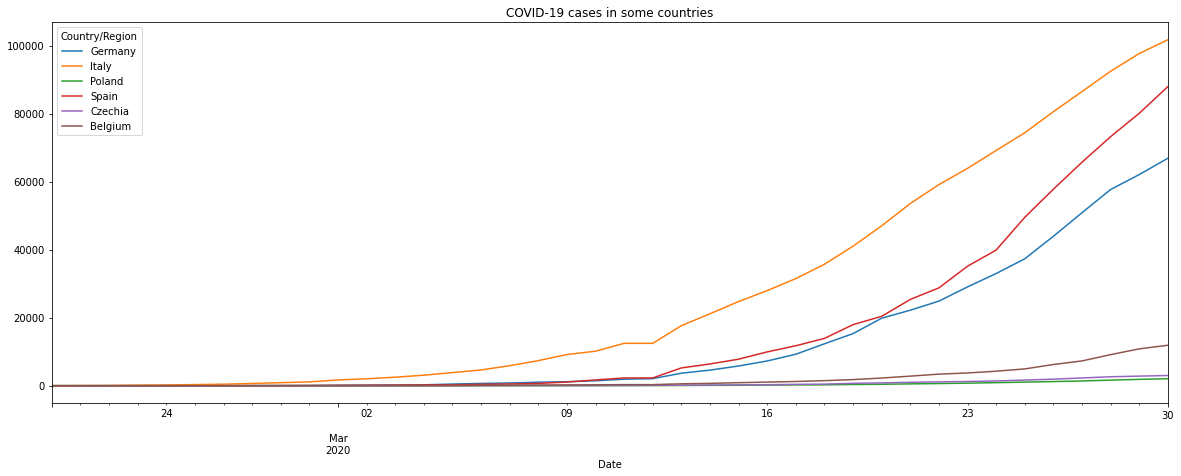

In [42]:
countries = ['Germany', 'Italy', 'Poland', 'Spain', 'Czechia', 'Belgium']

by_country[countries].plot(figsize=(20,7))
plt.title('COVID-19 cases in some countries')

Text(0.5, 1.0, 'COVID-19 cases in some countries (log scale)')

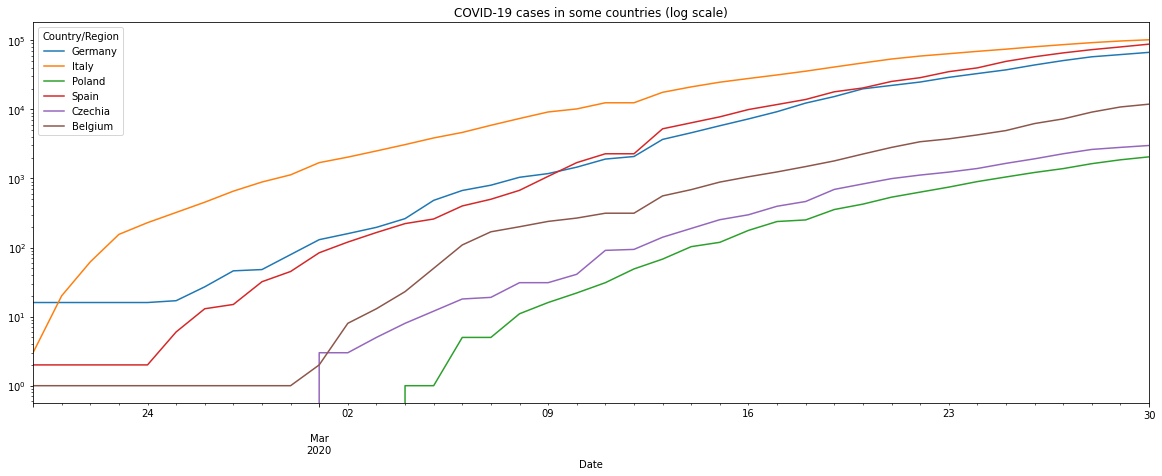

In [43]:
by_country[countries].plot(figsize=(20,7))
plt.yscale('log')
plt.title('COVID-19 cases in some countries (log scale)')

## Shape comparision of COVID-19 cases curves for some countries

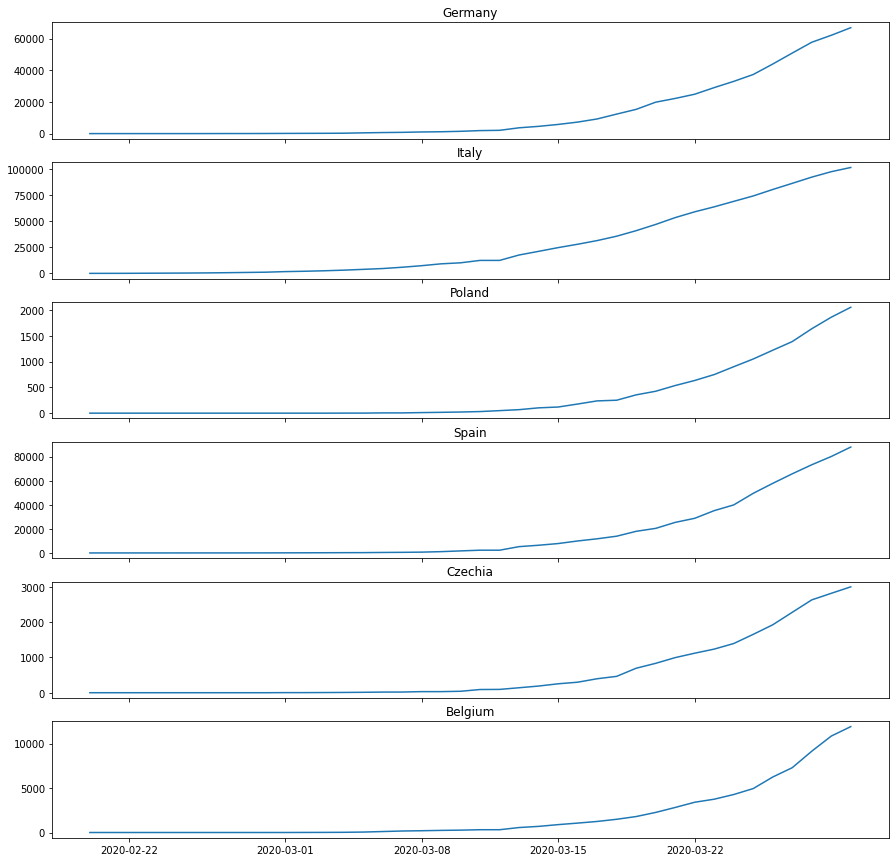

In [44]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(len(countries), 1, sharex=True, sharey=False)
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(len(countries)):
  eval(f'ax{i+1}.plot(by_country[countries[{i}]])')
  eval(f'ax{i+1}.set_title(countries[{i}])')
  


### Conclusion

Shapes of the curves do not differ significantly thus, the growth in each country is very similar 

In [45]:
by_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,...,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-26,94,174,367,224,4,7,502,290,2810,6909,122,9,458,44,18,86,6235,2,6,2,43,191,0,2985,114,264,152,0,4,96,75,4042,3,3,1306,81782,491,4,51,231,...,2,3,1,208,1012,105,384,7,683,226,562,2,927,57786,106,3,8,2840,11811,5,252,13,1045,1,23,65,197,3629,83836,14,196,333,11812,217,75,107,153,84,16,3
2020-03-27,110,186,409,267,4,7,589,329,3143,7657,165,10,466,48,24,94,7284,2,6,3,61,237,0,3417,115,293,180,8,5,99,91,4682,3,3,1610,81897,539,4,51,263,...,2,3,1,223,1104,119,457,7,732,269,632,3,1170,65719,106,3,8,3069,12928,5,267,13,1136,1,25,66,227,5698,101657,23,310,405,14745,238,88,107,163,91,22,5
2020-03-28,110,197,454,308,5,7,690,407,3640,8271,182,10,476,48,26,94,9134,2,6,3,74,258,0,3904,120,331,207,8,5,99,91,5576,3,3,1909,81999,608,4,65,295,...,2,3,1,224,1203,130,659,8,802,292,684,3,1187,73235,113,5,8,3447,14076,5,283,14,1245,1,25,74,278,7402,121478,30,356,468,17312,274,104,119,174,98,28,7
2020-03-29,120,212,511,334,7,7,745,424,3984,8788,209,11,499,48,33,94,10836,2,6,4,81,323,0,4256,126,346,222,10,6,103,139,6280,3,3,2139,82122,702,19,65,314,...,2,9,1,224,1299,142,741,8,844,314,730,3,1280,80110,117,6,8,3700,14829,9,298,14,1388,1,25,78,312,9217,140886,33,475,570,19780,304,144,119,188,109,29,7
2020-03-30,170,223,584,370,7,7,820,482,4361,9618,273,14,515,49,33,152,11899,3,6,4,97,368,3,4579,127,359,246,14,6,107,139,7398,3,5,2449,82198,798,19,81,330,...,7,9,1,230,1453,162,785,8,879,336,756,3,1326,87956,122,6,8,4028,15922,10,306,19,1524,1,30,82,312,10827,161807,33,548,611,22453,310,149,135,203,116,35,7


In [46]:
count_countries = by_country.loc['2020-03-20', countries]
count_countries

Country/Region
Germany    19848
Italy      47021
Poland       425
Spain      20410
Czechia      833
Belgium     2257
Name: 2020-03-20 00:00:00, dtype: int64

In [47]:
current = df.loc[(df['Country/Region'].isin(countries)) & (df['Date'] == '2020-03-20'), :]
current

,Country/Region,Cases,Date
14755,Belgium,2257,2020-03-20
14823,Czechia,833,2020-03-20
14852,Germany,19848,2020-03-20
14869,Italy,47021,2020-03-20
14915,Poland,425,2020-03-20
14933,Spain,20410,2020-03-20


Text(0.5, 1.08, 'COVID-19 Cases in some countries')

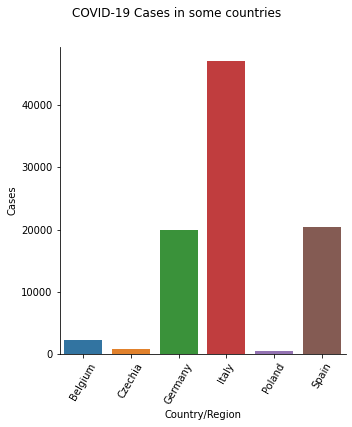

In [48]:
sns_fig = sns.catplot(x='Country/Region', y='Cases', data=current, kind='bar', ci=None)
sns_fig.set_xticklabels(rotation=60)
sns_fig.fig.suptitle('COVID-19 Cases in some countries', y=1.08)

In [53]:
!git add 

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
	modified:   Corona_ADek.ipynb

Untracked files:
	Italy_Energy_20.csv
	Italy_Temperature_19.csv
	Italy_Temperature_20.csv

no changes added to commit
